[chainer](http://nbviewer.jupyter.org/github/ashitani/jupyter_examples/blob/master/chainer.ipynb)と同じことをTensorFlowでやってみます。

In [1]:
import tensorflow as tf
import numpy as np
from IPython import display

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def get_batch(n):
    x = np.random.random(n)
    y = np.exp(x)
    return x,y

leaky_reluは標準装備じゃないのですが[こちら](https://groups.google.com/a/tensorflow.org/forum/#!topic/discuss/V6aeBw4nlaE)にエレガントな解がありました。

In [4]:
def leaky_relu(x,alpha=0.2):
    return tf.maximum(alpha*x,x)

chainerと呼び名が違うので注意です。最適化されるパラメータをVariableで定義します。
placeholderは値の入れる場所、というような意味のようです。問題と正解を入れます。
自乗誤差は[L2ノルム誤差](https://www.tensorflow.org/versions/r0.7/api_docs/python/nn.html#l2_loss)を使いました。
l2_loss(t)は$ \frac{1}{2}\sum t^2$とのことです。

chainerと違い、重みやバイアスを全部定義するのでちょっとコードが長くなります。

In [5]:
sess = tf.InteractiveSession()

x_ = tf.placeholder(tf.float32, shape=[None, 1])
t_ = tf.placeholder(tf.float32, shape=[None, 1])

W1 = tf.Variable(tf.random_normal([1,16]))
b1  = tf.Variable(tf.zeros([16]))

W2 =  tf.Variable(tf.random_normal([16,32]))
b2  = tf.Variable(tf.zeros([32]))

W3 =  tf.Variable(tf.random_normal([32,1]))
b3  =  tf.Variable(tf.zeros([1]))

sess.run(tf.initialize_all_variables())

h1 = leaky_relu(tf.matmul(x_,W1)+b1)
h2 = leaky_relu(tf.matmul(h1,W2)+b2)
y   = leaky_relu(tf.matmul(h2,W3)+b3)
e   =tf.nn.l2_loss(y-t_)

最適化はchainerとほとんど同じコードですが、値を引き出すには eval() メソッドにfeed_dictというものを渡します。プレイスホルダ名に対して値を示すHashを渡します。ちょっと読みづらい。。

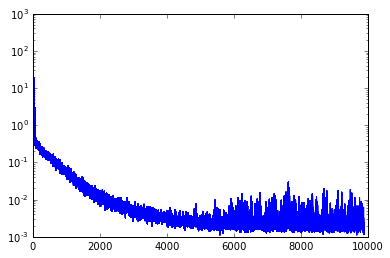

In [6]:
train_step = tf.train.AdamOptimizer().minimize(e)

losses =[]
sess.run(tf.initialize_all_variables())

batch_size=100
for i in range(10000):
    x,t = get_batch(batch_size)

    x = x.astype(np.float32).reshape(batch_size,1)
    t = t.astype(np.float32).reshape(batch_size,1)
    loss= e.eval(feed_dict={x_: x, t_:t})
    losses.append(loss)
    train_step.run(feed_dict={x_: x, t_:t})
    if i%100==0:
        plt.plot(losses,"b")
        plt.yscale('log')
        display.clear_output(wait=True)
        display.display(plt.gcf())    

display.clear_output(wait=True)

全般にロスがでかいんだけどなんだろう。初期値がしょぼいのかな。

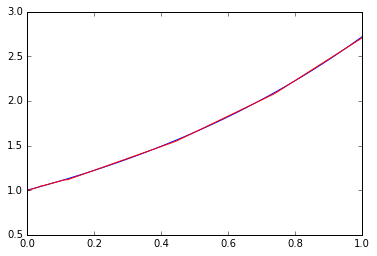

In [7]:
x=np.linspace(0,1,100)
plt.plot(x,np.exp(x))
plt.hold(True)
p=y.eval(feed_dict={x_: (x.astype(np.float32).reshape(100,1))})
_=plt.plot(x, p,"r")